In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape 

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.dropna(inplace=True)

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.drop('customerID', axis=1, inplace=True)

In [14]:
df = pd.get_dummies(df)

In [19]:
print([col for col in df.columns if 'Churn' in col])

['Churn_No', 'Churn_Yes']


In [20]:
df['Churn'] = df['Churn_Yes']

df.drop(['Churn_No', 'Churn_Yes'], axis=1, inplace=True)

In [21]:
print(df['Churn'].value_counts())
print(df.dtypes['Churn'])

Churn
False    5163
True     1869
Name: count, dtype: int64
bool


In [22]:
df['Churn'] = df['Churn'].astype(int)

In [23]:
print(df['Churn'].value_counts())
print(df.dtypes['Churn']) 

Churn
0    5163
1    1869
Name: count, dtype: int64
int64


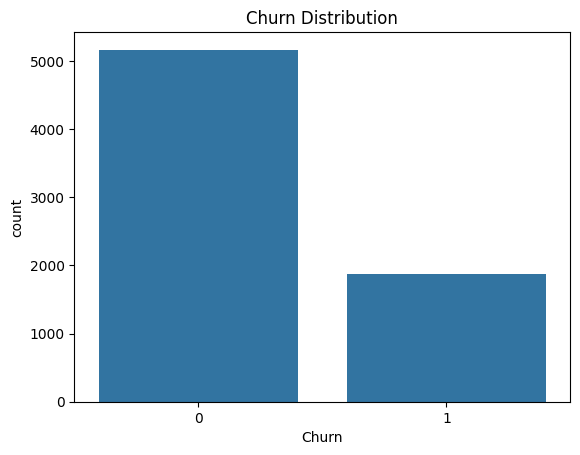

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

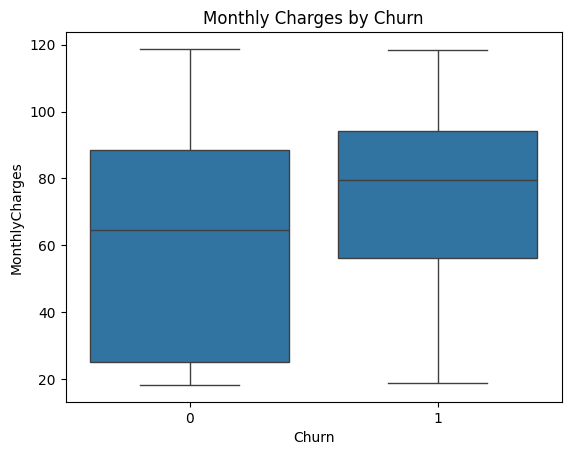

In [26]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

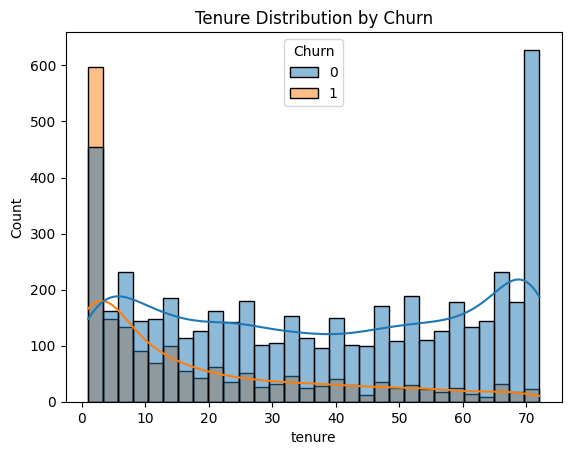

In [27]:
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

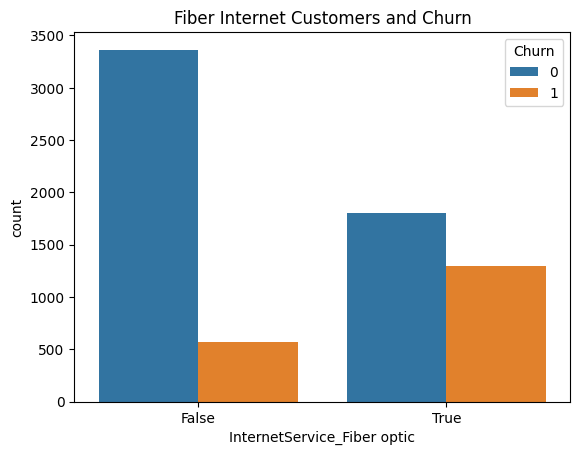

In [28]:
if 'InternetService_Fiber optic' in df.columns:
    sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df)
    plt.title('Fiber Internet Customers and Churn')
    plt.show()

In [30]:
X = df.drop('Churn', axis=1)  # All features except target
y = df['Churn']               # Target variable

# Now split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[916 117]
 [181 193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Accuracy Score:
0.7882018479033405


# Customer Churn Prediction – Business Summary & Recommendations

## Problem Statement
A telecom company was facing customer churn and needed a way to predict which users were likely to leave. Early prediction helps reduce churn and increase retention through proactive strategies.

##  Approach
- Used the **Telco Customer Churn dataset**
- Cleaned and prepared the data
- Conducted **EDA** to understand patterns in customer behavior
- Built a **Logistic Regression model** to predict churn
- Evaluated performance using accuracy, precision, recall, and F1-score

##  Key Insights from EDA
- Customers with **low tenure** are more likely to churn
- Customers with **higher monthly charges** churn more often
- **Fiber optic internet users** have a higher churn rate than others

##  Model Performance (Logistic Regression)
- **Accuracy:** ~79%
- **Precision for Churn (Class 1):** 62%
- **Recall for Churn:** 52%
- Model performs better at identifying customers who stay than those who leave

## Business Recommendations
- Offer onboarding perks or check-ins during the **first few months**
- Create loyalty plans or bundle offers for customers with **high monthly charges**
- Investigate customer experience with **fiber optic services**
- Use model predictions to **target at-risk customers** before they leave

## Next Steps
- Improve performance with **Random Forest model**
- Save and deploy model using `joblib`
- Document and showcase the project on **GitHub and Notion**

Random Forest Model

Trained a Random Forest Classifier to compare performance with Logistic Regression.

**Result:**  
Logistic Regression had slightly better performance in predicting churn (higher recall), so it was selected as the final model.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, rf_pred))

Confusion Matrix:
[[920 113]
 [200 174]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407


Accuracy Score:
0.7775408670931059


In [38]:
import joblib

# Save the logistic regression model
joblib.dump(model, 'logistic_churn_model.pkl')

['logistic_churn_model.pkl']